### 1、Import tensorflow and use tensorflow to define a constant.

In [33]:
import tensorflow.compat.v1 as tf

In [34]:
tf.disable_v2_behavior()

In [35]:
welcome = tf.constant('Welcome to Huawei')

### 2、Use tensorflow to print 'Welcome to Huawei'.

In [36]:
print(welcome)

Tensor("Const_8:0", shape=(), dtype=string)


In [37]:
session = tf.Session()
print (session.run(welcome)) 

b'Welcome to Huawei'


In [38]:
session.close() 

### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [39]:
a = tf.constant(5)
b = tf.constant(9)

In [40]:
with tf.Session() as sess:
     print(sess.run(a*b))

45


In [41]:
session.close() 

### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [42]:
session = tf.InteractiveSession()
X = tf.Variable(tf.random_normal([5,3],mean=1.0, stddev=1.0))
Y = tf.Variable(tf.random_normal([3,4],mean=1.0, stddev=1.0))

In [43]:
tf.global_variables_initializer().run()
multiplication = tf.matmul(X,Y)

In [44]:
print(multiplication)

Tensor("MatMul_6:0", shape=(5, 4), dtype=float32)


In [45]:
print(session.run(multiplication))
session.close()

[[ 0.8045607  -0.04752133 -0.7333451  -0.14805688]
 [ 6.845264    1.5495372  -0.14325917  2.2150412 ]
 [ 2.926396    0.8524998   2.8503785   2.9373171 ]
 [ 5.81348     1.5096284   2.678241    3.7903285 ]
 [ 2.3546345   1.5854129   3.115187    2.5486598 ]]


### 5、Try to use your own handwriting number to do image recognition

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time
import cv2
import matplotlib.pyplot as plt

In [47]:
mnist = input_data.read_data_sets("data\\MNIST_data\\", one_hot=True)

Extracting data\MNIST_data\train-images-idx3-ubyte.gz
Extracting data\MNIST_data\train-labels-idx1-ubyte.gz
Extracting data\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data\MNIST_data\t10k-labels-idx1-ubyte.gz


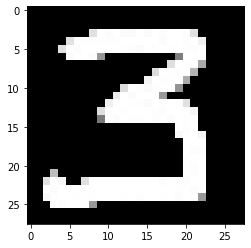

(1, 784)

In [48]:
def make_label(label_num):
    label = np.zeros((1,10),dtype='float32')
    label[:,label_num] = 1.0
    return label

label_test = make_label(3)
# the path of image
img_path = "data\\self_data\\3.jpg"
img_file = cv2.imread(img_path)
img_file = cv2.cvtColor(img_file, cv2.COLOR_RGB2GRAY)
img_file = 255 - img_file
for row in range(img_file.shape[0]):
    for col in range(img_file.shape[1]):
        if img_file[row][col] < 120.0:
            img_file[row][col] = 0
plt.imshow(img_file,'gray')
plt.show()
data_test = img_file / 255
data_test = np.float32(img_file.reshape(1, 28*28))
data_test.shape

In [49]:
input_num = 784
h1_num = 512
epochs = 3000
batch_num = 1000
lr = 0.09
W1 = tf.Variable(tf.truncated_normal([input_num, h1_num],stddev=0.1))
W2 = tf.Variable(tf.zeros([h1_num,10]))
B1 = tf.Variable(tf.zeros([h1_num]))
B2 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, input_num])
keep_prob = tf.placeholder(tf.float32)
label = tf.placeholder(tf.float32, [None,10])

hidden1 = tf.nn.relu(tf.matmul(x,W1) + B1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + B2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(label * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(lr).minimize(cross_entropy)

In [50]:
with tf.Session() as sess:
    start = time.time()
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_num)
        _,cost = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, label: batch_ys, keep_prob:0.75})
        if epoch % 100 == 0:
            print("epoch: {}, loss: {:.2f}".format(epoch, cost))
        
    stop = time.time()
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(label,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    predict_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, label: mnist.test.labels, keep_prob:1.0})
    print("The accuracy of the test data：{:.2f}%".format(predict_acc * 100))
    print("The total time：{:.2f}s".format(stop-start))
    test_acc,test_value = sess.run([accuracy,y], feed_dict={x:data_test, label:label_test, keep_prob:1.0})
    print("The accuracy of my: {:.2f}%".format(test_acc * 100))

epoch: 0, loss: 2.30
epoch: 100, loss: 0.37
epoch: 200, loss: 0.31
epoch: 300, loss: 0.23
epoch: 400, loss: 0.22
epoch: 500, loss: 0.18
epoch: 600, loss: 0.18
epoch: 700, loss: 0.16
epoch: 800, loss: 0.17
epoch: 900, loss: 0.18
epoch: 1000, loss: 0.14
epoch: 1100, loss: 0.11
epoch: 1200, loss: 0.13
epoch: 1300, loss: 0.10
epoch: 1400, loss: 0.11
epoch: 1500, loss: 0.13
epoch: 1600, loss: 0.10
epoch: 1700, loss: 0.11
epoch: 1800, loss: 0.11
epoch: 1900, loss: 0.11
epoch: 2000, loss: 0.10
epoch: 2100, loss: 0.08
epoch: 2200, loss: 0.08
epoch: 2300, loss: 0.06
epoch: 2400, loss: 0.07
epoch: 2500, loss: 0.07
epoch: 2600, loss: 0.07
epoch: 2700, loss: 0.06
epoch: 2800, loss: 0.06
epoch: 2900, loss: 0.05
The accuracy of the test data：97.90%
The total time：116.23s
The accuracy of my: 100.00%


In [51]:
print("The prediction by AI is {}".format(list(test_value[0]).index(test_value[0].max())))

The prediction by AI is 3
